# Data Preprocessing (Image)

In [2]:
#importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob, os

In [3]:
def extract_label(path, save_path, save_dir):
    """
    The extract_label function is being used to extract the labels about the leaf which includes the plant name and the disease that it may have.
    
    Args:
        path (string): this a string variable which is passed to the function which tells location of the image
        
    Variables:
        filename
    """

    
    
    # Initialize lists to store file paths and labels
    image_paths = []
    labels = []
    #data_folder = os.listdir(path)
    
    
    # Traverse through the directory and extract image paths and labels
    for label_folder in os.listdir(path):
        folder_path = os.path.join(path, label_folder)
        if os.path.isdir(folder_path):  
            # Use glob to find all image files in the subfolder
            images = glob.glob(os.path.join(folder_path, "*.jpg")) + \
                     glob.glob(os.path.join(folder_path, "*.png")) + \
                     glob.glob(os.path.join(folder_path, "*.jpeg"))  # Add formats as needed

            # Append file paths and labels
            image_paths.extend(images)
            labels.extend([label_folder] * len(images))  # Assign folder name as label
    
    # Convert labels to numeric format if needed
    unique_labels = sorted(set(labels))  # Create a sorted list of unique labels
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}  # Map labels to integers
    numeric_labels = [label_to_index[label] for label in labels]

    # Save image paths and labels to .npy files
    dir_path = os.path.join(save_path, save_dir)
    if os.path.isdir(dir_path):
        np.save(os.path.join(dir_path, f"{save_dir}_image_paths.npy"), np.array(image_paths))
        np.save(os.path.join(dir_path, f"{save_dir}_labels.npy"), np.array(numeric_labels))
        np.save(os.path.join(dir_path, f"{save_dir}_label_mapping.npy"), np.array(unique_labels))
    
    
    
    print("Data saved successfully!")
    

In [4]:
path = r"D:\FINAL DATASET"
save_path = r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data"
for save_dir in os.listdir(save_path):
    dir_path = os.path.join(path, save_dir)
    if os.path.isdir(dir_path):
        extract_label(dir_path, save_path, save_dir)

Data saved successfully!
Data saved successfully!
Data saved successfully!
Data saved successfully!
Data saved successfully!


In [5]:
# Load the .npy file

image_paths = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\GRAPE\GRAPE_image_paths.npy") 
label_mapping = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\CUCUMBER\cucumber_label_mapping.npy")
labels = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\CUCUMBER\cucumber_labels.npy")



# Print the data to check its contents

print(image_paths)
print(label_mapping)
print(labels) 


['D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(1).JPG'
 'D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(10).JPG'
 'D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(100).JPG'
 'D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(1000).JPG'
 'D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(1001).JPG'
 'D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(1002).JPG'
 'D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(1003).JPG'
 'D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(1004).JPG'
 'D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(1005).JPG'
 'D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(1006).JPG'
 'D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(1007).JPG'
 'D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(1008).JPG'
 'D:\\FINAL DATASET\\GRAPE\\Grape Black Measles\\GrapeBlackMeasles(100

In [6]:
def extract_img(path, save_path, save_dir):
    
    # Initialize lists to store images and labels
    images = []
    labels = []

    # Define image dimensions for resizing
    IMG_HEIGHT, IMG_WIDTH = 224, 224  

    # Traverse through the directory and load images and labels
    for label_folder in os.listdir(path):
        folder_path = os.path.join(path, label_folder)
        if os.path.isdir(folder_path):
            # Use glob to find all image files in the subfolder
            image_files = glob.glob(os.path.join(folder_path, "*.jpg")) + \
                          glob.glob(os.path.join(folder_path, "*.png")) + \
                          glob.glob(os.path.join(folder_path, "*.jpeg"))  # Add formats as needed

            for image_file in image_files:
                # Load image
                img = cv2.imread(image_file)
                if img is not None:
                    # Resize image
                    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                    # Normalize image
                    img = img / 255.0
                    # Append image and label
                    images.append(img)
                    labels.append(label_folder)

    # Convert labels to numeric format
    unique_labels = sorted(set(labels))  
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}  # Map labels to integers
    numeric_labels = [label_to_index[label] for label in labels]

    # Convert images and labels to numpy arrays
    images_array = np.array(images, dtype=np.float32)
    labels_array = np.array(numeric_labels, dtype=np.int32)
    
    # Save images and labels to .npy files
    dir_path = os.path.join(save_path, save_dir)
    if os.path.isdir(dir_path):
        np.save(os.path.join(dir_path, f"{save_dir}_images.npy"), np.array(images_array))
        np.save(os.path.join(dir_path, f"{save_dir}_labels.npy"), np.array(labels_array))
        np.save(os.path.join(dir_path, f"{save_dir}_label_mapping.npy"), np.array(unique_labels))
        print(f"{save_dir} Images shape: {images_array.shape}")
        print("Data saved successfully!")

In [ ]:
path = r"D:\FINAL DATASET"
save_path = r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data"
for save_dir in os.listdir(save_path):
    dir_path = os.path.join(path, save_dir)
    if os.path.isdir(dir_path):
        extract_img(dir_path, save_path, save_dir)

CUCUMBER Images shape: (1329, 224, 224, 3)
Data saved successfully!
GRAPE Images shape: (878, 224, 224, 3)
Data saved successfully!
POTATO Images shape: (684, 224, 224, 3)
Data saved successfully!


In [7]:
dir_path = os.path.join(path, "CUCUMBER")
if os.path.isdir(dir_path):
    extract_img(dir_path, save_path, "CUCUMBER")

CUCUMBER Images shape: (1329, 224, 224, 3)
Data saved successfully!


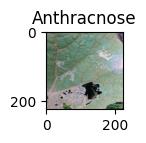

In [24]:
images = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\CUCUMBER\cucumber_images.npy")
Uclabels = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\CUCUMBER\cucumber_label_mapping.npy")
clabels = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\CUCUMBER\cucumber_labels.npy")
plt.figure(figsize=(1,1))
plt.title(Uclabels[clabels[13]])
plt.imshow(images[13], cmap='gray')

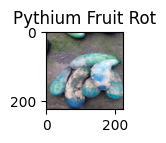

In [26]:
plt.figure(figsize=(1,1))
plt.title(Uclabels[clabels[1320]])
plt.imshow(images[1320], cmap='gray')

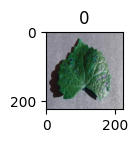

In [9]:
images = np.load(r"C:\Users\omgha\OneDrive\Documents\GitHub\MMTL-Plant_disease_detection\data\GRAPE\GRAPE_images.npy")
plt.figure(figsize=(1,1))
plt.title(labels[0])
plt.imshow(images[0], cmap='gray')

In [ ]:
dir_path = os.path.join(path, "CUCUMBER")
if os.path.isdir(dir_path):
    extract_img(dir_path, save_path, "CUCUMBER")